# Algorytmika i matematyka uczenia maszynowego 
## Laboratorium 11

### Zadanie 1

W okolicy znajdują się 3 obozy, nie wiemy ile osób bierze w nich udział natomiast znamy ich zamówienia na
dwa produkty: 
- woda, 
- kawa.

Wyświetl dane na wykresie, gdzie na osi X oraz Y znajdują się zamówienia na wodę oraz kawę (odpowiednio), 
a każdy obóz reprezentowany jest jako punkt na wykresie. 
Dodatkowo, wykreśl linię prowadzącą z punktu (0, 0) do każdego z nich.
Następnie, oblicz odległość euklidesową oraz odl. kosinusową pomiędzy obozami i wskaż które są najbardziej podobne do siebie.

> Wykres powinien zawierać legendę oraz opisy osi.

Dane:

| Nazwa obozu     | Zamówienia na wodę (w l.) | Zamówienia na kawę (w szt.) |
| :---            | ---                       | --- |
| Obóz sportowy 1 | 200 | 25  |
| Obóz sportowy 2 | 900 | 80  |
| Obóz szachowy   | 300 | 120 |



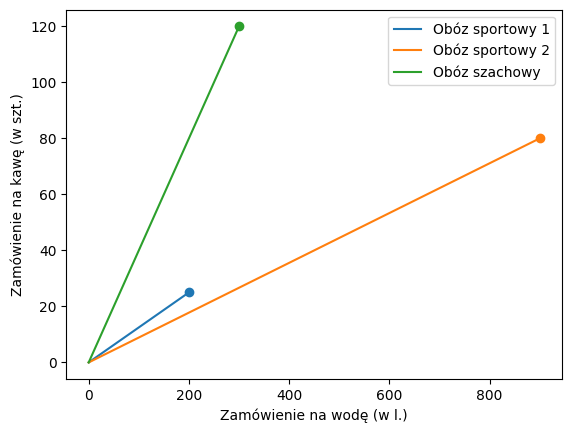

In [6]:
import matplotlib.pyplot as plt
import numpy as np


zamowienia = np.array([[200, 25], [900, 80], [300, 120]])
labels = ['Obóz sportowy 1', 'Obóz sportowy 2', 'Obóz szachowy']
for i in range(zamowienia.shape[0]):
    plt.plot([0, zamowienia[i, 0]], [0, zamowienia[i, 1]], label=labels[i])
    plt.scatter(zamowienia[i, 0], zamowienia[i, 1])
plt.xlabel("Zamówienie na wodę (w l.)")
plt.ylabel("Zamówienie na kawę (w szt.)")
plt.legend()
plt.show()

In [ ]:
def e_dist(point_1, point_2):
    return np.sqrt(np.sum(np.square(point_1-point_2)))

In [9]:
print(f" Odległość między obozami spotowym 1 i sportowym 2: {round(e_dist(zamowienia[0], zamowienia[1]), 2)}")
print(f" Odległość między obozami spotowym 2 i szachowym: {round(e_dist(zamowienia[1], zamowienia[2]), 2)}")
print(f" Odległość między obozami spotowym 1 i szachowym: {round(e_dist(zamowienia[0], zamowienia[2]), 2)}")

 Odległość między obozami spotowym 1 i sportowym 2: 702.16
 Odległość między obozami spotowym 2 i szachowym: 601.33
 Odległość między obozami spotowym 1 i szachowym: 137.93


In [ ]:
def cos_dist(x, y):
    return 1-(x@y)/(np.linalg.norm(x)*np.linalg.norm(y))

In [15]:
print(f" Odległość między obozami spotowym 1 i sportowym 2: {round(cos_dist(zamowienia[0], zamowienia[1]), 3)}")
print(f" Odległość między obozami spotowym 2 i szachowym: {round(cos_dist(zamowienia[1], zamowienia[2]), 3)}")
print(f" Odległość między obozami spotowym 1 i szachowym: {round(cos_dist(zamowienia[0], zamowienia[2]), 3)}")

 Odległość między obozami spotowym 1 i sportowym 2: 0.001
 Odległość między obozami spotowym 2 i szachowym: 0.042
 Odległość między obozami spotowym 1 i szachowym: 0.033


### Zadanie 2

#### A)

Mamy dane dotyczące kilku parków narodowych. Chcielibyśmy wykorzystać poznane w poprzednim zadaniu miary podobieństwa w celu odnalezienia najbardziej podobnych parków na podstawie pewnych szacunkowych pomiarów liczby drzew (iglastych i liściastych) oraz populacji kilku gatunków zwierząt. 

  

1. Dla każdej pary parków oblicz odległość euklidesową i kosinusową. 
2. Odnajdź parę najbardziej podobnych parków. 
3. Na podstawie uzyskanych wyników odpowiedz na pytanie która miara wg. ciebie zwraca lepszy wynik? Uzasadnij, dlaczego.
4. Znajdź park najbardziej podobny do Tatrzańskiego Parku Narodowego? 

Szacunkowe dane:

| Nazwa                                       | Liczba drzew iglastych | Liczba drzew liściastych | Liczba dzików | Liczba wilków | Liczba niedźwiedzi | Liczba jeleni |
| ---                                         | ---      | ---    |--- |--- | --- | ---  |
|Tatrzański Park Narodowy (Polska)            |   1000000|  200000|  90|  75|   50|  1200|
|Białowieski Park Narodowy (Polska)           |    250000| 1100000| 250|  40|    0|  1000|
|Yellowstone National Park (Stany Zjednoczone)|  30000000| 1000000|   0| 120| 1200| 30000|
|Banff National Park (Kanada)                 | 110000000| 7000000|   0|  40|  120|  5000|
|Nadbajkalski Park Narodowy (Rosja)           |   8000000| 2100000| 700| 550|  225|  6000|

In [37]:
from itertools import combinations


park_data = np.array([
    ['Tatrzański Park Narodowy', 1000000, 200000, 90, 75, 50, 1200], 
    ['Białowieski Park Narodowy', 250000, 1100000, 250, 40, 0, 1000],
    ['Yellowstone National Park', 30000000, 1000000, 0, 120, 1200, 30000],
    ['Banff National Park', 110000000, 7000000, 0, 40, 120, 5000],
    ['Nadbajkalski Park Narodowy', 8000000, 2100000, 700, 550, 225, 6000],
    ])

X = park_data[:, 1:].astype(int)
park_names = park_data[:, 0]

indexes = list(range(5))
comb = list(combinations(indexes, 2))

In [2]:
wyniki = []
for kombinacja in comb:
    indx_1 = kombinacja[0]
    indx_2 = kombinacja[1]
    print(f"Odległość między parkiem {park_names[indx_1]} a {park_names[indx_2]} : {round(e_dist(X[indx_1], X[indx_2]), 2)}")
    wyniki.append(round(e_dist(X[indx_1], X[indx_2]), 2))

Odległość między parkiem Tatrzański Park Narodowy a Białowieski Park Narodowy : 1171537.48
Odległość między parkiem Tatrzański Park Narodowy a Yellowstone National Park : 29011046.7
Odległość między parkiem Tatrzański Park Narodowy a Banff National Park : 109211904.18
Odległość między parkiem Tatrzański Park Narodowy a Nadbajkalski Park Narodowy : 7253276.75
Odległość między parkiem Białowieski Park Narodowy a Yellowstone National Park : 29750182.23
Odległość między parkiem Białowieski Park Narodowy a Banff National Park : 109908473.36
Odległość między parkiem Białowieski Park Narodowy a Nadbajkalski Park Narodowy : 7814251.44
Odległość między parkiem Yellowstone National Park a Banff National Park : 80224688.38
Odległość między parkiem Yellowstone National Park a Nadbajkalski Park Narodowy : 22027495.95
Odległość między parkiem Banff National Park a Nadbajkalski Park Narodowy : 102117628.26


In [1]:
for kombinacja in comb:
    indx_1 = kombinacja[0]
    indx_2 = kombinacja[1]
    print(f"Odległość między parkiem {park_names[indx_1]} a {park_names[indx_2]} : {round(cos_dist(X[indx_1], X[indx_2]), 5)}")

Odległość między parkiem Tatrzański Park Narodowy a Białowieski Park Narodowy : 0.59144
Odległość między parkiem Tatrzański Park Narodowy a Yellowstone National Park : 0.01343
Odległość między parkiem Tatrzański Park Narodowy a Banff National Park : 0.00894
Odległość między parkiem Tatrzański Park Narodowy a Nadbajkalski Park Narodowy : 0.00176
Odległość między parkiem Białowieski Park Narodowy a Yellowstone National Park : 0.74601
Odległość między parkiem Białowieski Park Narodowy a Banff National Park : 0.7169
Odległość między parkiem Białowieski Park Narodowy a Nadbajkalski Park Narodowy : 0.53806
Odległość między parkiem Yellowstone National Park a Banff National Park : 0.00046
Odległość między parkiem Yellowstone National Park a Nadbajkalski Park Narodowy : 0.02485
Odległość między parkiem Banff National Park a Nadbajkalski Park Narodowy : 0.0186



#### B)

Co można zrobić, aby odległość euklidesowa zwracała wyniki podobne do kosinusowej? Wykonaj zadanie ponownie uzyskując inne (być może "lepsze") wyniki dla odległości euklidesowej niż w podzadaniu A.

In [54]:
from sklearn.preprocessing import MinMaxScaler


park_data = np.array([
    ['Tatrzański Park Narodowy', 1000000, 200000, 90, 75, 50, 1200], 
    ['Białowieski Park Narodowy', 250000, 1100000, 250, 40, 0, 1000],
    ['Yellowstone National Park', 30000000, 1000000, 0, 120, 1200, 30000],
    ['Banff National Park', 110000000, 7000000, 0, 40, 120, 5000],
    ['Nadbajkalski Park Narodowy', 8000000, 2100000, 700, 550, 225, 6000],
])
X = park_data[:, 1:]
park_names = park_data[:, 0]

['Tatrzański Park Narodowy' 'Białowieski Park Narodowy'
 'Yellowstone National Park' 'Banff National Park'
 'Nadbajkalski Park Narodowy']


In [3]:
wyniki = []
for kombinacja in comb:
    indx_1 = kombinacja[0]
    indx_2 = kombinacja[1]
    norm_1 = np.linalg.norm(X[indx_1])
    norm_2 = np.linalg.norm(X[indx_2])
    normalized_A = X[indx_1] / norm_1
    normalized_B = X[indx_2] / norm_2

    print(f"Odległość między parkiem {park_names[indx_1]} a {park_names[indx_2]} : {round(e_dist(normalized_A, normalized_B), 2)}")
    wyniki.append(round(e_dist(X[indx_1], X[indx_2]), 2))

Odległość między parkiem Tatrzański Park Narodowy a Białowieski Park Narodowy : 0.64
Odległość między parkiem Tatrzański Park Narodowy a Yellowstone National Park : 1.2
Odległość między parkiem Tatrzański Park Narodowy a Banff National Park : 1.37
Odległość między parkiem Tatrzański Park Narodowy a Nadbajkalski Park Narodowy : 0.38
Odległość między parkiem Białowieski Park Narodowy a Yellowstone National Park : 1.39
Odległość między parkiem Białowieski Park Narodowy a Banff National Park : 1.23
Odległość między parkiem Białowieski Park Narodowy a Nadbajkalski Park Narodowy : 0.77
Odległość między parkiem Yellowstone National Park a Banff National Park : 1.18
Odległość między parkiem Yellowstone National Park a Nadbajkalski Park Narodowy : 1.21
Odległość między parkiem Banff National Park a Nadbajkalski Park Narodowy : 1.27


### Zadanie 3 

Plik `glosowanie.csv` zawiera imiona, nazwiska oraz przynależność do klubu poselskiego posłów, którzy głosowali na TAK w głosowaniu identyfikowanym poprzez numer posiedzenia i glosowania. 

Zbiór danych obejmuje zakres wszystkich głosowań od trzeciego do 13 posiedzenia Sejmu RP X kadencji.

Twoim zadaniem jest odnalezienie, które kluby poselskie głosują podobnie. Dodatkowo podaj parę klubów, które głosują najmniej podobnie. Podaj także,
który klub głosuje najbardziej odmiennie (suma odległości do wszystkich
pozostałych klubów jest największa). 

> Uwaga! Uwzględnij, że niektóre kluby poselskie zmieniły nazwę (zgrupuj je). 

In [86]:
import pandas as pd

glosowanie_data = pd.read_csv('glosowanie.csv')
glosowanie_data.replace('Kukiz15', 'PiS', inplace=True)
glosowanie_data.replace('Nowa_Lewica', 'Lewica', inplace=True)
glosowanie_data.replace('PSL-TD', 'Polska2050', inplace=True)
glosowanie_data.replace('Polska2050-TD', 'Polska2050', inplace=True)
glosowanie_data.replace('PSL', 'Polska2050', inplace=True)
glosowanie_data.replace('PSL-TD', 'Polska2050', inplace=True)


topics = glosowanie_data['temat'].unique()
partie_all = glosowanie_data['klub'].unique()

decision = []
for temat in topics:
    for partia in partie_all:
        if len(glosowanie_data[(glosowanie_data['klub'] == partia) & (df['temat'] == temat)]) > 0:
            decision.append(1)
        else:
            decision.append(0)

In [107]:
PiS = []
Konfederacja = []
Lewica = []
KO = []
Polska2050 = []
niez = []
for i, decyzja in enumerate(decision):
    klub = i%6
    if klub == 0:
        PiS.append(decyzja[1])
    elif klub == 1:
        Konfederacja.append(decyzja[1])
    elif klub == 2:
        Lewica.append(decyzja[1])
    elif klub == 3:
        KO.append(decyzja[1])
    elif klub == 4:
        Polska2050.append(decyzja[1])
    elif klub == 5:
        niez.append(decyzja[1])

PiS = np.array(PiS)
Konfederacja = np.array(Konfederacja)
Lewica = np.array(Lewica)
KO = np.array(KO)
Polska2050 = np.array(Polska2050)
niez = np.array(niez)

matrix = np.vstack((PiS, Konfederacja, Lewica, KO, Polska2050, niez))

In [98]:
def metric(punkt_1, punkt_2):
    return np.sum(np.abs(punkt_1-punkt_2))

In [4]:
indeksy = list(range(6))
kombinacje = list(combinations(indeksy, 2))

for kombinacja in kombinacje:
    indx_park_1 = kombinacja[0]
    indx_park_2 = kombinacja[1]
    print(f"Odległość między klubami {partie_all[indx_park_1]} a {partie_all[indx_park_2]} : {metric(matrix[indx_park_1], matrix[indx_park_2])}")


Odległość między klubami PiS a Konfederacja : 50
Odległość między klubami PiS a Lewica : 74
Odległość między klubami PiS a KO : 74
Odległość między klubami PiS a Polska2050 : 69
Odległość między klubami PiS a niez. : 54
Odległość między klubami Konfederacja a Lewica : 74
Odległość między klubami Konfederacja a KO : 76
Odległość między klubami Konfederacja a Polska2050 : 69
Odległość między klubami Konfederacja a niez. : 52
Odległość między klubami Lewica a KO : 6
Odległość między klubami Lewica a Polska2050 : 9
Odległość między klubami Lewica a niez. : 74
Odległość między klubami KO a Polska2050 : 13
Odległość między klubami KO a niez. : 76
Odległość między klubami Polska2050 a niez. : 79


In [5]:
suma_odleglosci_partii = []
for i in range(len(partie_all)):
    odleglosc_partii = []
    for j in range(len(metric)):
        odleglosc_partii.append(metric(matrix[i], matrix[j]))
    suma_odleglosci_partii.append((sum(odleglosc_partii), partie_all[i]))

posortowane_partie = sorted(suma_odleglosci_partii, key=lambda x: x[0], reverse=True)
print(posortowane_partie)


[(335, 'niez'), (321, 'PiS'), (321, 'Konfederacja'), (245, 'KO'), (239, 'Polska2050'), (237, 'Lewica')]
